# TP MM03
### Data Science Exercises
This notebook contains solutions for exercises described in the TP document, including data manipulation, visualization, and cleaning using Pandas and other libraries.

## Exercise 1: Loan Requests and Credits
### Objective
Analyze loan data to calculate financial metrics and visualize insights.

In [1]:
import pandas as pd

# Load the data
data = pd.read_csv('data_mm03_loans.csv')
data.head()

,identifiant,ville,CP,revenu,remboursement,duree,type,taux
0,0,TOULOUSE,31100,3669.0,1130.05,240,immobilier,1.168
1,1,PARIS,75009,5310.0,240.00,64,automobile,3.701
2,1,PARIS,75009,5310.0,1247.85,300,immobilier,1.173
3,2,MARSEILLE,13010,1873.0,552.54,240,immobilier,0.972
4,3,MARSEILLE,13010,1684.0,586.03,180,immobilier,1.014


### Q2: Data Enrichment

In [3]:
# Q2.1: Calculate 'taux_endettement'
data['taux_endettement'] = round((data['remboursement'] / data['revenu']) * 100, 2)
# Q2.2: Rename 'taux' to 'taux_interet'
data.rename(columns={'taux': 'taux_interet'}, inplace=True)
# Q2.3: Calculate 'cout_total'
data['cout_total'] = data['remboursement'] * data['duree']
# Q2.4: Calculate 'benefices'
data['benefices'] = (data['cout_total'] * data['taux_interet']) / (100 * 24)
data.head()

,identifiant,ville,CP,revenu,remboursement,duree,type,taux_interet,taux_endettement,cout_total,benefices
0,0,TOULOUSE,31100,3669.0,1130.05,240,immobilier,1.168,30.80,271212.0,131.989840
1,1,PARIS,75009,5310.0,240.00,64,automobile,3.701,4.52,15360.0,23.686400
2,1,PARIS,75009,5310.0,1247.85,300,immobilier,1.173,23.50,374355.0,182.966006
3,2,MARSEILLE,13010,1873.0,552.54,240,immobilier,0.972,29.50,132609.6,53.706888
4,3,MARSEILLE,13010,1684.0,586.03,180,immobilier,1.014,34.80,105485.4,44.567581


### Q3: Preliminary Visualizations

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


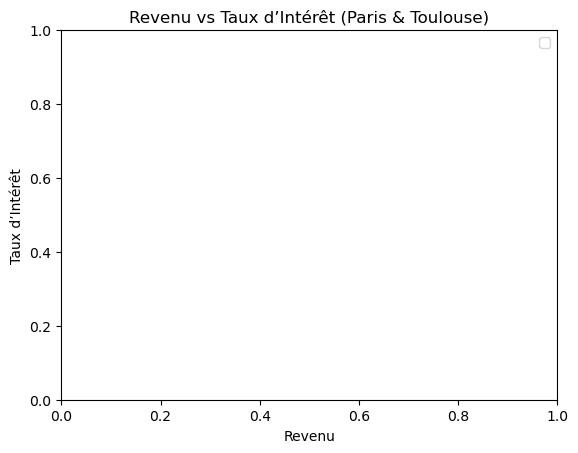

In [4]:
import matplotlib.pyplot as plt

# Q3.1: Scatter plot for Paris and Toulouse
paris_toulouse = data[data['ville'].isin(['Paris', 'Toulouse'])]
for city in paris_toulouse['ville'].unique():
    subset = paris_toulouse[paris_toulouse['ville'] == city]
    plt.scatter(subset['revenu'], subset['taux_interet'], label=city)

plt.legend()
plt.title('Revenu vs Taux d’Intérêt (Paris & Toulouse)')
plt.xlabel('Revenu')
plt.ylabel('Taux d’Intérêt')
plt.show()

### Q4: Filtering and Manipulations

In [7]:
# Q4.1: Loans of type 'automobile'
auto_loans = data[data['type'] == 'automobile']
# Q4.2: IDs of clients with 'automobile' loans
auto_loan_ids = auto_loans['identifiant']
# Q4.3: IDs and income of clients with 'automobile' loans
auto_loan_info = auto_loans[['identifiant', 'revenu']]
auto_loan_info.head()

,identifiant,revenu
1,1,5310.0
65,63,4114.0
67,64,4326.0
87,83,2207.0
100,95,6069.0


### Q5: Aggregations

In [9]:
# Q5.1: Count and average total cost of 'automobile' loans
auto_loan_count = auto_loans.shape[0]
auto_loan_avg_cost = auto_loans['cout_total'].mean()
auto_loan_count, auto_loan_avg_cost

(16, 13665.0)

## Exercise 2: Olympic Games Analysis
### Objective
Analyze historical Olympic data to derive insights and visualizations.

### Q1: Data Import and Null Values

In [8]:
olympic_data = pd.read_csv('data_mm03_Olympics.csv')

# Count null values per column and total
null_counts = olympic_data.isnull().sum()
total_nulls = null_counts.sum()
null_counts, total_nulls

(ID             0
 Name           0
 Sex            0
 Age         9474
 Height     60171
 Weight     62875
 Team           0
 NOC            0
 Games          0
 Year           0
 Season         0
 City           0
 Sport          0
 Event          0
 Medal     231333
 dtype: int64,
 363853)

### Q2: Data Exploration and Filtering

In [10]:
# Q2.1: Count unique sports and the least represented ones
unique_sports = olympic_data['Sport'].value_counts()
least_represented = unique_sports.tail(20)
least_represented

Sport
Softball               478
Curling                463
Rugby Sevens           299
Golf                   247
Skeleton               199
Tug-Of-War             170
Rugby                  162
Trampolining           152
Polo                    95
Lacrosse                60
Alpinism                25
Cricket                 24
Military Ski Patrol     24
Croquet                 19
Motorboating            17
Racquets                12
Jeu De Paume            11
Roque                    4
Basque Pelota            2
Aeronautics              1
Name: count, dtype: int64

In [11]:
# Q2.2: Countries with <10 appearances and the most represented
country_counts = olympic_data['Team'].value_counts()
rare_countries = country_counts[country_counts < 10]
most_represented = country_counts.head(3)
rare_countries, most_represented

(Team
 Mascotte                           9
 Pannonia RC/National RC            9
 Berliner Ruderverein von 1876-2    9
 Gteborgs Roddklubb-1               9
 Sydney Rowing Club                 9
                                   ..
 Demi-Mondaine-15                   1
 Demi-Mondaine-17                   1
 Notavel                            1
 Galopin De La Font                 1
 Pop Art                            1
 Name: count, Length: 818, dtype: int64,
 Team
 United States    17847
 France           11988
 Great Britain    11404
 Name: count, dtype: int64)

### Q3: Advanced Queries

In [12]:
# Q3.1: Oldest athlete and oldest medalist
oldest_athlete = olympic_data.loc[olympic_data['Age'].idxmax()]
medalist_data = olympic_data[olympic_data['Medal'].notnull()]
oldest_medalist = medalist_data.loc[medalist_data['Age'].idxmax()]
oldest_athlete, oldest_medalist

(ID                                             128719
 Name                           John Quincy Adams Ward
 Sex                                                 M
 Age                                              97.0
 Height                                            NaN
 Weight                                            NaN
 Team                                    United States
 NOC                                               USA
 Games                                     1928 Summer
 Year                                             1928
 Season                                         Summer
 City                                        Amsterdam
 Sport                                Art Competitions
 Event     Art Competitions Mixed Sculpturing, Statues
 Medal                                             NaN
 Name: 257054, dtype: object,
 ID                                                22984
 Name      John (Herbert Crawford-) Copley (Williamson-)
 Sex                           

### Q4: Evolution of Medals Over Time

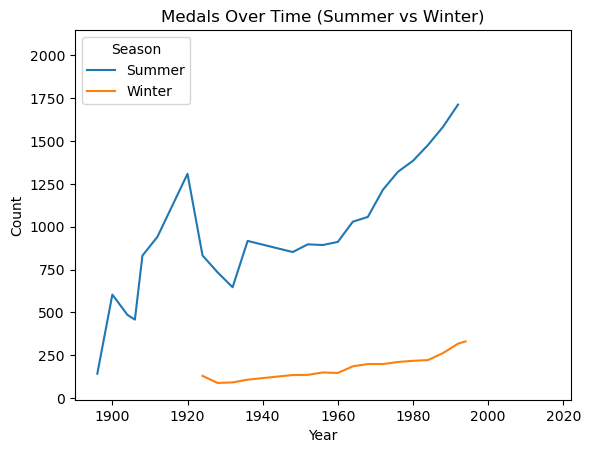

In [13]:
medal_counts = olympic_data.groupby(['Year', 'Season'])['Medal'].count().unstack()
medal_counts.plot(kind='line', title='Medals Over Time (Summer vs Winter)', xlabel='Year', ylabel='Count')
plt.show()

### Q5: Distribution Analysis

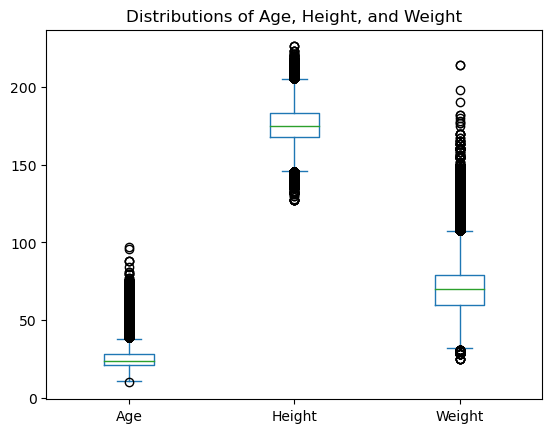

In [14]:
# Q5.1: Boxplots for age, height, and weight
olympic_data[['Age', 'Height', 'Weight']].plot.box(title='Distributions of Age, Height, and Weight')
plt.show()

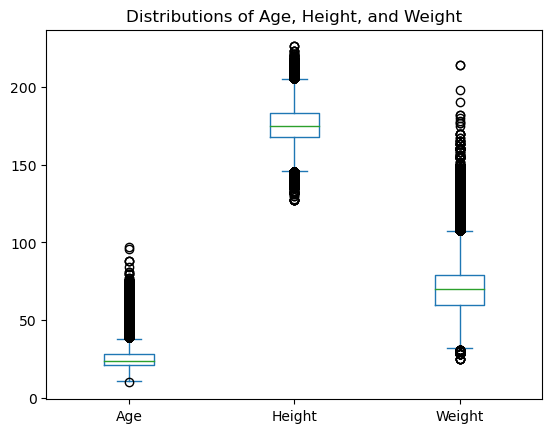

,count,mean,std,min,25%,50%,75%,max,variance
Age,261642.0,25.556898,6.393561,10.0,21.0,24.0,28.0,97.0,40.877620
Height,210945.0,175.338970,10.518462,127.0,168.0,175.0,183.0,226.0,110.638048
Weight,208241.0,70.702393,14.348020,25.0,60.0,70.0,79.0,214.0,205.865678


In [15]:
boxplot_data = olympic_data[['Age', 'Height', 'Weight']]
boxplot_data.plot.box(title='Distributions of Age, Height, and Weight')
plt.show()

# Q5.2-Q5.3: Characterize distributions
distribution_stats = boxplot_data.describe().T
distribution_stats['variance'] = boxplot_data.var()
distribution_stats

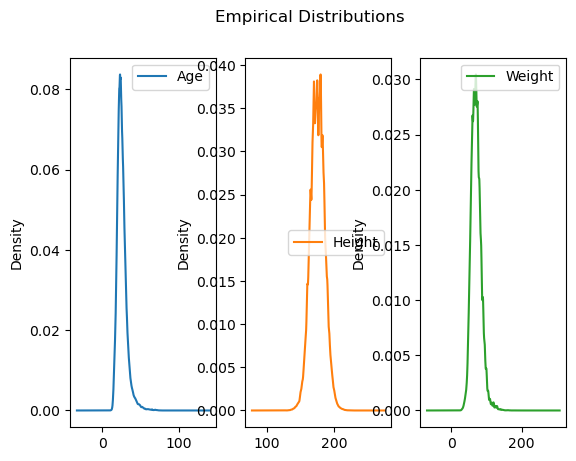

In [16]:
boxplot_data.plot(kind='density', subplots=True, layout=(1, 3), sharex=False, title='Empirical Distributions')
plt.show()

In [17]:
correlation_matrix = boxplot_data.corr()
print(correlation_matrix)

             Age    Height    Weight
Age     1.000000  0.138246  0.212069
Height  0.138246  1.000000  0.796213
Weight  0.212069  0.796213  1.000000


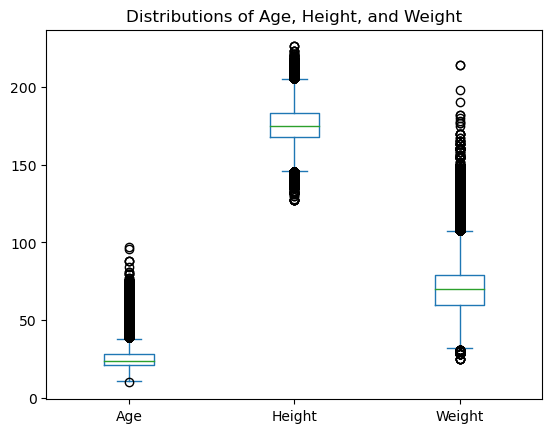

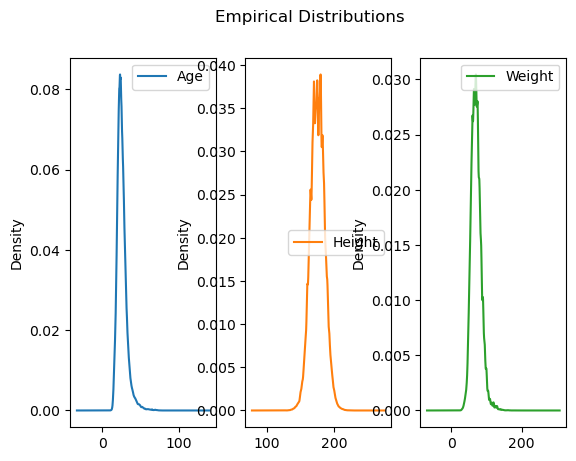

,Age,Height,Weight
Age,1.000000,0.138246,0.212069
Height,0.138246,1.000000,0.796213
Weight,0.212069,0.796213,1.000000


In [18]:
boxplot_data = olympic_data[['Age', 'Height', 'Weight']]
boxplot_data.plot.box(title='Distributions of Age, Height, and Weight')
plt.show()

# Q5.2-Q5.3: Characterize distributions
distribution_stats = boxplot_data.describe().T
distribution_stats['variance'] = boxplot_data.var()
distribution_stats

# Q5.4: Empirical Distributions
boxplot_data.plot(kind='density', subplots=True, layout=(1, 3), sharex=False, title='Empirical Distributions')
plt.show()

# Q5.5: Correlation Analysis
correlation_matrix = boxplot_data.corr()
correlation_matrix